In [1]:
import random
import mne, os, glob
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import random
from mne.datasets import somato
from mne.time_frequency import tfr_morlet
%matplotlib qt 

""" 
create data path
"""
# Create data paths 
data_directory = 'C:/Users/mvmigem/Documents/data/project_1/pilot/clara/'
eeg_file_path = data_directory + 'eeg/main_clara.bdf'
mastoid_clean_eeg_path = data_directory + 'eeg/clara_main_clean_mastoidref-epo.fif'

behav_file_path = data_directory + 'behav/pilot_predatt_participant_4.csv'

epochs = mne.read_epochs(mastoid_clean_eeg_path)
ep_mastoid = mne.read_epochs(mastoid_clean_eeg_path)
raw = mne.io.read_raw_bdf(eeg_file_path, preload = True)

behave_data = pd.read_csv(behav_file_path)

pp = 1
events_raw = mne.find_events(raw=raw)
ep_events = ep_mastoid.events
# Add the metadata and add a column for later regular trial subselection
behave_data['precedes_odd'] = behave_data['expected'].shift(-1).eq('odd').astype(int)
meta_data = pd.DataFrame(np.repeat(behave_data.values, 5, axis=0), columns=behave_data.columns)
# For Clara there was an error that accidentaly dropped the last stims of 11 trials (prob due to block cuttoff)
lost_stim = []
for i in range(len(ep_events)-4):
    if ep_events[i,2] == 99:
        if ep_events[i +5,2] !=99:
            lost_stim.append(i+4)
meta_data = meta_data.drop(lost_stim).iloc[:len(ep_events)]

ep_mastoid.metadata = meta_data

# Divide the epoch file into sections based on metadata that can't be distinguished by event names
# Drop catch trials
epochs_nocatch = ep_mastoid['catch_trial == 0']
# Divide attention conditions
epochs_attended = epochs_nocatch['attention == "attended"']
epochs_unattended = epochs_nocatch['attention == "unattended"']
# Divide by staring position
epochs_start4 = epochs_nocatch['start_position == 3']
epochs_start2 = epochs_nocatch['start_position == 1']
# Divide unattended trials by start pos
epochs_unattended_start4 = epochs_unattended['start_position == 3']
epochs_unattended_start2 = epochs_unattended['start_position == 1']
# Divide attented trials by start pos
epochs_attended_start4 = epochs_attended['start_position == 3']
epochs_attended_start2 = epochs_attended['start_position == 1']
# Extra devision for the odd boys
epochs_attended_reg = epochs_attended['expected =="regular"']
epochs_attended_odd = epochs_attended['expected == "odd"']
epochs_unattended_reg = epochs_unattended['expected =="regular"']
epochs_unattended_odd = epochs_unattended['expected == "odd"']



Reading C:\Users\mvmigem\Documents\data\project_1\pilot\clara\eeg\clara_main_clean_mastoidref-epo.fif ...
    Found the data of interest:
        t =     -97.66 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
4189 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\mvmigem\Documents\data\project_1\pilot\clara\eeg\clara_main_clean_mastoidref-epo.fif ...
    Found the data of interest:
        t =     -97.66 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
4189 matching events found
No baseline correction applied
0 projection items activated
Extracting EDF parameters from C:\Users\mvmigem\Documents\data\project_1\pilot\clara\eeg\main_clara.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1465855  =      0.000 ...  2862.998 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=Tr

In [95]:
""" 
create data path Maura
"""
# Create data paths 
data_directory = 'C:/Users/mvmigem/Documents/data/project_1/pilot/maura/'
eeg_file_path = data_directory + 'eeg/main_exp_1.bdf'
mastoid_clean_eeg_path = data_directory + 'eeg/main_exp_1_clean_mastoidref-epo.fif'

behav_file_path = data_directory + 'behavioural/pilot_predatt_participant_2.csv'

epochs = mne.read_epochs(mastoid_clean_eeg_path)
ep_mastoid = mne.read_epochs(mastoid_clean_eeg_path)
raw = mne.io.read_raw_bdf(eeg_file_path, preload = True)

behave_data = pd.read_csv(behav_file_path)

pp = 1
events_raw = mne.find_events(raw=raw)
ep_events = ep_mastoid.events
# Add the metadata and add a column for later regular trial subselection
behave_data['precedes_odd'] = behave_data['expected'].shift(-1).eq('odd').astype(int)
meta_data = pd.DataFrame(np.repeat(behave_data.values, 5, axis=0), columns=behave_data.columns)
ep_mastoid.metadata = meta_data

# Divide the epoch file into sections based on metadata that can't be distinguished by event names
# Drop catch trials
epochs_nocatch = ep_mastoid['catch_trial == 0']
# Divide attention conditions
epochs_attended = epochs_nocatch['attention == "attended"']
epochs_unattended = epochs_nocatch['attention == "unattended"']
# Divide by staring position
epochs_start3 = epochs_nocatch['start_position == 2']
epochs_start1 = epochs_nocatch['start_position == 0']
# Divide unattended trials by start pos
epochs_unattended_start3 = epochs_unattended['start_position == 2']
epochs_unattended_start1 = epochs_unattended['start_position == 0']
# Divide attented trials by start pos
epochs_attended_start3 = epochs_attended['start_position == 2']
epochs_attended_start1 = epochs_attended['start_position == 0']
# Extra devision for the odd boys
epochs_attended_reg = epochs_attended['expected =="regular"']
epochs_attended_odd = epochs_attended['expected == "odd"']
epochs_unattended_reg = epochs_unattended['expected =="regular"']
epochs_unattended_odd = epochs_unattended['expected == "odd"']

Reading C:\Users\mvmigem\Documents\data\project_1\pilot\maura\eeg\main_exp_1_clean_mastoidref-epo.fif ...
    Found the data of interest:
        t =     -97.66 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
4200 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\mvmigem\Documents\data\project_1\pilot\maura\eeg\main_exp_1_clean_mastoidref-epo.fif ...
    Found the data of interest:
        t =     -97.66 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
4200 matching events found
No baseline correction applied
0 projection items activated
Extracting EDF parameters from C:\Users\mvmigem\Documents\data\project_1\pilot\maura\eeg\main_exp_1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1653247  =      0.000 ...  3228.998 secs...
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=Tr

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


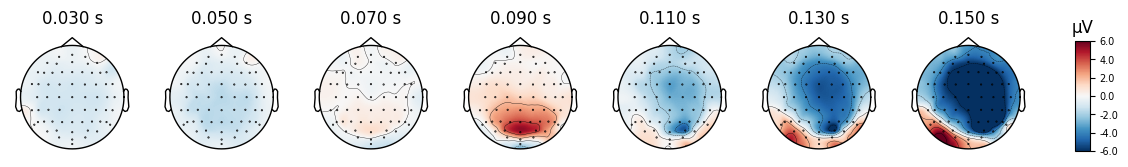

In [57]:
"""
Main pos topo
"""
times = np.linspace(0.03, 0.15, 7)
vlim=(-6, 6)

epochs_nocatch['pos1'].average().plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=vlim)
epochs_nocatch['pos2'].average().plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=vlim)
epochs_nocatch['pos3'].average().plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=vlim)
epochs_nocatch['pos4'].average().plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=vlim)

### Evoked plotting

In [ ]:
"""
Main pos individual channels
"""
evoked_pos1 = epochs_nocatch['pos1'].average()
evoked_pos2 = epochs_nocatch['pos2'].average()
evoked_pos3 = epochs_nocatch['pos3'].average()
evoked_pos4 = epochs_nocatch['pos4'].average()

evokeds_list = [evoked_pos1,evoked_pos2,evoked_pos3,evoked_pos4]
conds = ('pos1','pos2','pos3','pos4')
# conds = ('seq1','seq2','seq3','seq4')

norm = dict(zip(conds, evokeds_list))

In [ ]:
""" 
attended: 2v4
"""
ep_reg4 = epochs_attended_start4['pos4/seq4']
ep_odd4 = epochs_attended_start4['pos4/seq2']
ep_reg2 = epochs_attended_start2['pos2/seq4']
ep_odd2 = epochs_attended_start2['pos2/seq2']
# random_numbers4 = random.sample(range(0, len(ep_reg4)), len(ep_odd4))
# random_numbers2 = random.sample(range(0, len(ep_reg2)), len(ep_odd2))

In [ ]:
""" 
unattended: 2v4
"""
ep_reg4 = epochs_unattended_start3['pos4/seq4']
ep_odd4 = epochs_unattended_start3['pos4/seq2']
ep_reg2 = epochs_unattended_start1['pos2/seq4']
ep_odd2 = epochs_unattended_start1['pos2/seq2']
# random_numbers4 = random.sample(range(0, len(ep_reg4)), len(ep_odd4))
# random_numbers2 = random.sample(range(0, len(ep_reg2)), len(ep_odd2))

In [ ]:
""" 
any: 2v4
"""
ep_reg4 = epochs_start3['pos4/seq4']
ep_odd4 = epochs_start3['pos4/seq2']
ep_reg2 = epochs_start1['pos2/seq4']
ep_odd2 = epochs_start1['pos2/seq2']

# random_numbers4 = random.sample(range(0, len(ep_reg4)), len(ep_odd4))
# random_numbers2 = random.sample(range(0, len(ep_reg2)), len(ep_odd2))

In [ ]:
"""
prediction
"""
evoked_pos1 = ep_reg4['precedes_odd'].average()
evoked_pos2 = ep_odd4.average()
evoked_pos3 = ep_reg2[random_numbers2].average()
evoked_pos4 = ep_odd2.average()

evokeds_list = [evoked_pos1,evoked_pos2,evoked_pos3,evoked_pos4]
conds = ('reg4','odd4','reg2','odd2')
norm = dict(zip(conds, evokeds_list))

In [2]:
""" 
4: attention x predicion Maura
"""
ep_reg_att = epochs_attended_start1['precedes_odd == 1']['pos4/seq2']
ep_odd_att = epochs_attended_start3['pos4/seq2']
ep_reg_unatt = epochs_unattended_start1['precedes_odd == 1']['pos4/seq2']
ep_odd_unatt = epochs_unattended_start3['pos4/seq2']

# random_numbers_att = random.sample(range(0, len(ep_reg_att)), len(ep_odd_att))
# random_numbers_unatt = random.sample(range(0, len(ep_reg_unatt)), len(ep_odd_unatt))

NameError: name 'epochs_attended_start1' is not defined

In [3]:
""" 
4: attention x predicion Clara
"""
ep_reg_att = epochs_attended_start2['precedes_odd == 1']['pos1/seq2']
ep_odd_att = epochs_attended_start4['pos1/seq2']
ep_reg_unatt = epochs_unattended_start2['precedes_odd == 1']['pos1/seq2']
ep_odd_unatt = epochs_unattended_start4['pos1/seq2']

# random_numbers_att = random.sample(range(0, len(ep_reg_att)), len(ep_odd_att))
# random_numbers_unatt = random.sample(range(0, len(ep_reg_unatt)), len(ep_odd_unatt))

In [80]:
""" 
2: attention x predicion
"""
ep_reg_att = epochs_attended_start3['precedes_odd == 1']['pos2/seq2']
ep_odd_att = epochs_attended_start1['pos2/seq2']
ep_reg_unatt = epochs_unattended_start3['precedes_odd == 1']['pos2/seq2']
ep_odd_unatt = epochs_unattended_start1['pos2/seq2']

# random_numbers_att = random.sample(range(0, len(ep_reg_att)), len(ep_odd_att))
# random_numbers_unatt = random.sample(range(0, len(ep_reg_att)), len(ep_odd_unatt))


In [ ]:
""" 
2: attention x predicion 
"""
ep_reg_att = epochs_attended_start4['precedes_odd == 1']['pos3/seq2']
ep_odd_att = epochs_attended_start2['pos3/seq2']
ep_reg_unatt = epochs_unattended_start4['precedes_odd == 1']['pos3/seq2']
ep_odd_unatt = epochs_unattended_start2['pos3/seq2']

In [4]:
"""
prediction v attention
"""
evoked_pos1 = ep_reg_att.average()
evoked_pos2 = ep_odd_att.average()
evoked_pos3 = ep_reg_unatt.average()
evoked_pos4 = ep_odd_unatt.average()

evokeds_list = [evoked_pos1,evoked_pos2,evoked_pos3,evoked_pos4]
conds = ('att reg','att odd','unatt reg','unatt odd')
norm = dict(zip(conds, evokeds_list))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [ ]:
""" 
sequence evaluation
"""
ep_reg_p4s2 = epochs_attended_start1['pos4/seq2']
ep_reg_p4s4 = epochs_attended_start3['pos4/seq4']
ep_reg_p2s2 = epochs_attended_start1['pos2/seq2']
ep_reg_p2s4 = epochs_attended_start3['pos2/seq4']


In [59]:
"""
sequence evaluation
"""
evoked_pos1 = ep_reg_p4s2.average()
evoked_pos2 = ep_reg_p4s4.average()
evoked_pos3 = ep_reg_p2s2.average()
evoked_pos4 = ep_reg_p2s4.average()

evokeds_list = [evoked_pos1,evoked_pos2,evoked_pos3,evoked_pos4]
conds = ('p4s2','p4s4','p2s2','p2s4')
norm = dict(zip(conds, evokeds_list))

NameError: name 'ep_reg_p4s2' is not defined

In [98]:
epoch_set1 = norm
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'POz', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'Pz', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'Oz', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))


[<Figure size 800x600 with 2 Axes>]

In [88]:
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'O1', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'O2', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))

[<Figure size 800x600 with 2 Axes>]

In [ ]:
# mne.viz.plot_compare_evokeds(epoch_set1, picks= 'P1', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'P2', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))

In [86]:
# mne.viz.plot_compare_evokeds(epoch_set1, picks= 'PO2', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'PO3', vlines=[0.05,0.1],ylim=dict(eeg=[-10, 10]))

[<Figure size 800x600 with 2 Axes>]

In [65]:
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'Fz', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'FCz', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))

[<Figure size 800x600 with 2 Axes>]

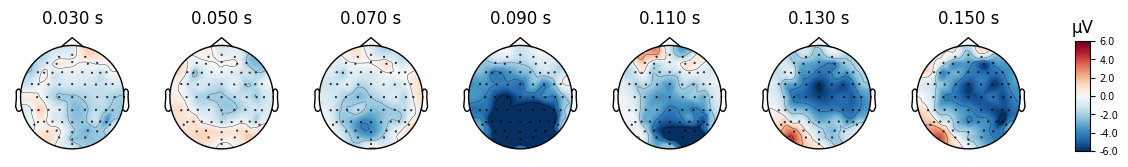

In [94]:
"""

"""
times = np.linspace(0.03, 0.15, 7)
vlim=(-6, 6)

evoked_pos1.plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=vlim)
evoked_pos2.plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=vlim)
evoked_pos3.plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=vlim)
evoked_pos4.plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=vlim)

### Time course of c1 peaks and means

In [ ]:
""" 
Time course simple position
"""
c1_window_epochs = epochs_nocatch.crop(tmin=.07, tmax=.1)
pos1_win_data = c1_window_epochs['pos1'].get_data(picks='POz')
pos2_win_data = c1_window_epochs['pos2'].get_data(picks='POz')
pos3_win_data = c1_window_epochs['pos3'].get_data(picks='POz')
pos4_win_data = c1_window_epochs['pos4'].get_data(picks='POz')


In [ ]:
""" 
Time course
"""
position = ['pos1','pos2','pos3','pos4']
condition = 'attention == "attended" & expected == "regular" & start_position == 2'
pos1_win_data = c1_window_epochs[condition][position[0]].get_data(picks='POz')
pos2_win_data = c1_window_epochs[condition][position[1]].get_data(picks='POz')
pos3_win_data = c1_window_epochs[condition][position[2]].get_data(picks='POz')
pos4_win_data = c1_window_epochs[condition][position[3]].get_data(picks='POz')

In [ ]:
mean_c1_1 = pos1_win_data.mean(axis=2).squeeze()
mean_c1_2 = pos2_win_data.mean(axis=2).squeeze()
mean_c1_3 = pos3_win_data.mean(axis=2).squeeze()
mean_c1_4 = pos4_win_data.mean(axis=2).squeeze()

max_c1_1 = pos1_win_data.max(axis=2).squeeze()
max_c1_2 = pos2_win_data.max(axis=2).squeeze()
max_c1_3 = pos3_win_data.max(axis=2).squeeze()
max_c1_4 = pos4_win_data.max(axis=2).squeeze()

mean_c1_list = [mean_c1_1,mean_c1_2,mean_c1_3,mean_c1_4]
max_c1_list = [max_c1_1,max_c1_2,max_c1_3,max_c1_4]

In [ ]:
"""
Plotting mean c1 voltage time wise
"""
plt.rcParams["figure.figsize"] = [18,10]
fig, axs = plt.subplots(2,2, sharey=True)

sns.regplot(x = np.arange(len(mean_c1_list[0])), y = mean_c1_list[0], ax=axs[0,0])
sns.regplot(x = np.arange(len(mean_c1_list[1])), y = mean_c1_list[1], ax=axs[0,1])
sns.regplot(x = np.arange(len(mean_c1_list[2])), y = mean_c1_list[2], ax=axs[1,1])
sns.regplot(x = np.arange(len(mean_c1_list[3])), y = mean_c1_list[3], ax=axs[1,0])

plt.suptitle('mean valus ' + condition)
plt.tight_layout()
plt.show()

In [ ]:
"""
Plotting max c1 voltage time wise
"""
plt.rcParams["figure.figsize"] = [18,10]
fig, axs = plt.subplots(2,2, sharey=True)

sns.regplot(x = np.arange(len(max_c1_list[0])), y = max_c1_list[0], ax=axs[0,0])
sns.regplot(x = np.arange(len(max_c1_list[1])), y = max_c1_list[1], ax=axs[0,1])
sns.regplot(x = np.arange(len(max_c1_list[2])), y = max_c1_list[2], ax=axs[1,1])
sns.regplot(x = np.arange(len(max_c1_list[3])), y = max_c1_list[3], ax=axs[1,0])

plt.suptitle('max values '+ condition)
plt.tight_layout()
plt.show()

### Time frequency exploration

In [6]:
spec_first_att = epochs_attended['pos4/seq2'].average().compute_psd()
spec_last_att = epochs_attended['seq3'].average().compute_psd()
spec_first_unatt = epochs_unattended['seq1'].average().compute_psd()
spec_last_unatt = epochs_unattended['seq3'].average().compute_psd()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows


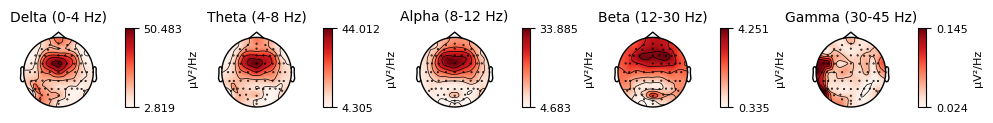

In [10]:
spec_first_att.plot_topomap(ch_type="eeg")
spec_first_unatt.plot_topomap(ch_type="eeg")

In [19]:
freqs = np.logspace(*np.log10([8, 13]), num=8)
n_cycles = freqs / 3.0  # different number of cycle per frequency
power, itc = tfr_morlet(
    epochs_attended['pos4/seq2'],
    freqs=freqs,
    n_cycles=n_cycles,
    use_fft=True,
    return_itc=True,
    n_jobs=None,
)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


In [41]:

power.plot([27], baseline=(-0.09, 0), mode="logratio", title=power.ch_names[27])

fig, axes = plt.subplots(1, 2, figsize=(7, 4), layout="constrained")
topomap_kw = dict(
    ch_type="eeg", tmin=0.09, tmax=0.5, baseline=(-0.09, 0), mode="logratio", show=False
)
plot_dict = dict(Alpha=dict(fmin=8, fmax=13))
for ax, (title, fmin_fmax) in zip(axes, plot_dict.items()):
    power.plot_topomap(**fmin_fmax, axes=ax, **topomap_kw)
    ax.set_title(title)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


In [40]:
wiii =power.ch_names